# Basics

> An end-to-end tutorial on how to use the dabest library.

- order: 1

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Create dataset for demo

Here, we create a dataset to illustrate how ``dabest`` works. In
this dataset, each column corresponds to a group of observations.

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2,
                 'Control 3' : c3,     'Test 3' : t3,
                 'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                 'Gender'    : gender, 'ID'  : id_col
                })

Note that we have 9 groups (3 Control samples and 6 Test samples). Our
dataset has also a non\-numerical column indicating gender, and another
column indicating the identity of each observation.

This is known as a *wide* dataset. See this 
[writeup](https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/) 
for more details.

In [ ]:
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Gender,ID
0,2.793984,3.420875,3.324661,1.707467,3.816940,1.796581,4.440050,2.937284,3.486127,Female,1
1,3.236759,3.467972,3.685186,1.121846,3.750358,3.944566,3.723494,2.837062,2.338094,Female,2
2,3.019149,4.377179,5.616891,3.301381,2.945397,2.832188,3.214014,3.111950,3.270897,Female,3
3,2.804638,4.564780,2.773152,2.534018,3.575179,3.048267,4.968278,3.743378,3.151188,Female,4
4,2.858019,3.220058,2.550361,2.796365,3.692138,3.276575,2.662104,2.977341,2.328601,Female,5


## Loading data

Before creating estimation plots and obtaining confidence intervals for our effect sizes, we need to load the data and specify the relevant groups.

We can achieve this by supplying the dataframe to ``dabest.load()``. Additionally, we must provide the two groups to be compared in the ``idx`` argument as a tuple or list.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


Calling this ``Dabest`` object gives you a gentle greeting, as well as
the comparisons that can be computed.

In [ ]:
two_groups_unpaired

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:47 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

### Changing statistical parameters

You can change the width of the confidence interval by manipulating the ``ci`` argument.

In [ ]:
two_groups_unpaired_ci90 = dabest.load(df, idx=("Control 1", "Test 1"), ci=90)

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
two_groups_unpaired_ci90

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:47 2024.

Effect size(s) with 90% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

## Effect sizes

The **dabest** library now features a range of effect sizes:

  - the mean difference (`mean＿diff`)
  - the median difference (`median＿diff`)
  - [Cohen's d](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) (`cohens＿d`)
  - [Hedges' g](https://en.wikipedia.org/wiki/Effect_size#Hedges'_g) (`hedges＿g`)
  - [Cohen's h](https://en.wikipedia.org/wiki/Cohen's_h) (`cohens＿h`)
  - [Cliff's delta](https://en.wikipedia.org/wiki/Effect_size#Effect_size_for_ordinal_data) (`cliffs＿delta`)
  
[comment]: <> (Please copy this underline for the above ＿)
 
Each of these are attributes of the ``Dabest`` object.

In [ ]:
two_groups_unpaired.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:47 2024.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.221, 0.768].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

For each comparison, the type of effect size is reported (here, it's the
"unpaired mean difference"). The confidence interval is reported as:
[*confidenceIntervalWidth* *LowerBound*, *UpperBound*]

This confidence interval is generated through bootstrap resampling. See [`bootstraps`](/blog/posts/bootstraps/bootstraps.ipynb) for more details.

Since v0.3.0, DABEST will report the p-value of the [non-parametric two-sided approximate permutation t-test](https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests). This is also known as *the Monte Carlo permutation test*.

For unpaired comparisons, the p-values and test statistics of [Welch's t test](https://en.wikipedia.org/wiki/Welch%27s_t-test>), 
[Student's t test](https://en.wikipedia.org/wiki/Student%27s_t-test), 
and [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) can be found. For paired comparisons, the p-values and test statistics of the 
[paired Student's t](https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples)
and [Wilcoxon](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) tests are presented.


In [ ]:
pd.options.display.max_columns = 50
two_groups_unpaired.mean_diff.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Control 1,Test 1,20,20,mean difference,None,0.48029,95,0.220869,0.767721,"(140, 4889)",0.215697,0.761716,"(125, 4875)","[0.6686169333655454, 0.4382051534234943, 0.665...",5000,12345,"[-0.17259843762502491, 0.03802293852634886, -0...",0.001,5000,"[0.026356588154404337, 0.027102495439046997, 0...",0.002094,-3.308806,0.002057,-3.308806,0.001625,83.0


In [ ]:
two_groups_unpaired.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Control 1,Test 1,20,20,mean difference,None,0.48029,95,0.220869,0.767721,0.001,0.002094,-3.308806,0.002057,-3.308806,0.001625,83.0


Let's compute the *Hedges'g*   for our comparison.

In [ ]:
two_groups_unpaired.hedges_g

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:48 2024.

The unpaired Hedges' g between Control 1 and Test 1 is 1.03 [95%CI 0.349, 1.62].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.hedges_g.statistical_tests`

In [ ]:
two_groups_unpaired.hedges_g.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Control 1,Test 1,20,20,Hedges' g,None,1.025525,95,0.349394,1.618579,"(42, 4724)",0.472844,1.74166,"(125, 4875)","[1.1337301267831184, 0.8311210968422604, 1.539...",5000,12345,"[-0.3295089865590538, 0.07158401210924781, -0....",0.001,5000,"[0.026356588154404337, 0.027102495439046997, 0...",0.002094,-3.308806,0.002057,-3.308806,0.001625,83.0


## Producing estimation plots

To generate a **Gardner-Altman estimation plot**, simply use the
``.plot()`` method. You can learn more about its genesis and design
inspiration at [`robust-beautiful`](/blog/posts/robust-beautiful/robust-beautiful.ipynb).

Each instance of an effect size has access to the ``.plot()`` method. This allows you to quickly create plots for different effect sizes with ease.

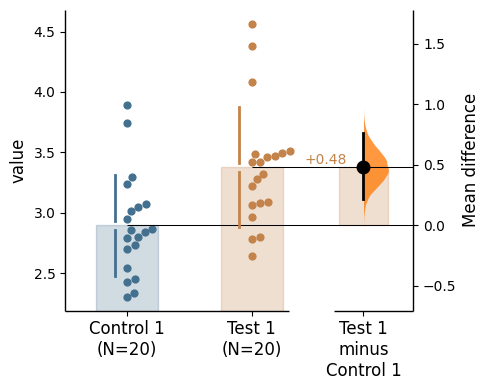

In [ ]:
two_groups_unpaired.mean_diff.plot();

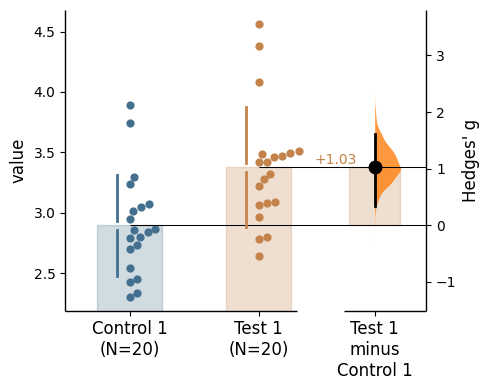

In [ ]:
two_groups_unpaired.hedges_g.plot();

Instead of a Gardner-Altman plot, you can generate a **Cumming estimation
plot** by setting ``float_contrast=False`` in the ``plot()`` method.
This will plot the bootstrap effect sizes below the raw data, and also
displays the the mean (gap) and ± standard deviation of each group
(vertical ends) as gapped lines. This design was inspired by Edward
Tufte's dictum to maximise the data-ink ratio.

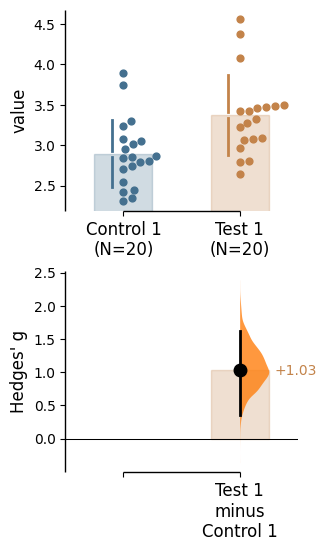

In [ ]:
two_groups_unpaired.hedges_g.plot(float_contrast=False);

The ``dabest`` package also implements a range of estimation plot
designs aimed at depicting common experimental designs.

The **multi-two-group estimation plot** tiles two or more Cumming plots
horizontally, and is created by passing a *nested tuple* to ``idx`` when
``dabest.load()`` is first invoked.

Thus, the lower axes in the Cumming plot is effectively a [forest
plot](https://en.wikipedia.org/wiki/Forest_plot), commonly used in
meta-analyses to aggregate and to compare data from different experiments.

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


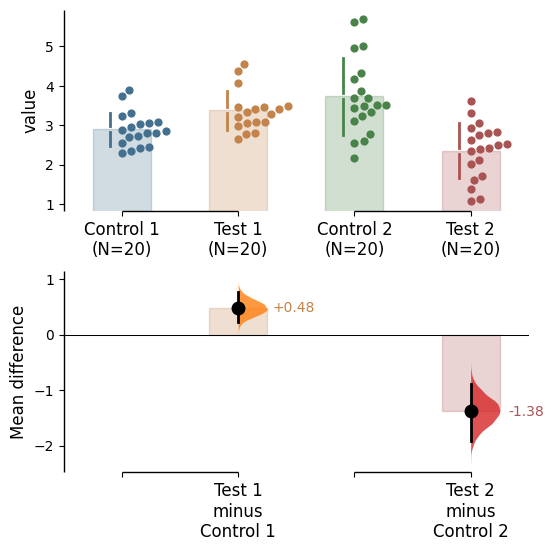

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1",),
                                         ("Control 2", "Test 2")
                                       ))

multi_2group.mean_diff.plot();

The **shared control plot** displays another common experimental
paradigm, where several test samples are compared against a common
reference sample.

This type of Cumming plot is automatically generated if the tuple passed
to ``idx`` has more than two data columns.

In [ ]:
shared_control = dabest.load(df, idx=("Control 1", "Test 1",
                                          "Test 2", "Test 3",
                                          "Test 4", "Test 5", "Test 6")
                                 )

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
shared_control

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:49 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 1
3. Test 3 minus Control 1
4. Test 4 minus Control 1
5. Test 5 minus Control 1
6. Test 6 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
shared_control.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:50 2024.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.221, 0.768].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 2 is -0.542 [95%CI -0.914, -0.211].
The p-value of the two-sided permutation t-test is 0.0042, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 3 is 0.174 [95%CI -0.295, 0.628].
The p-value of the two-sided permutation t-test is 0.479, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 4 is 0.79 [95%CI 0.306, 1.31].
The p-value of the two-sided permutation t-test is 0.0042, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 5 is 0.265 [95%CI 0.0137, 0.497].
The p-value of the two-sided permutation t-test is 0.0404, calcu

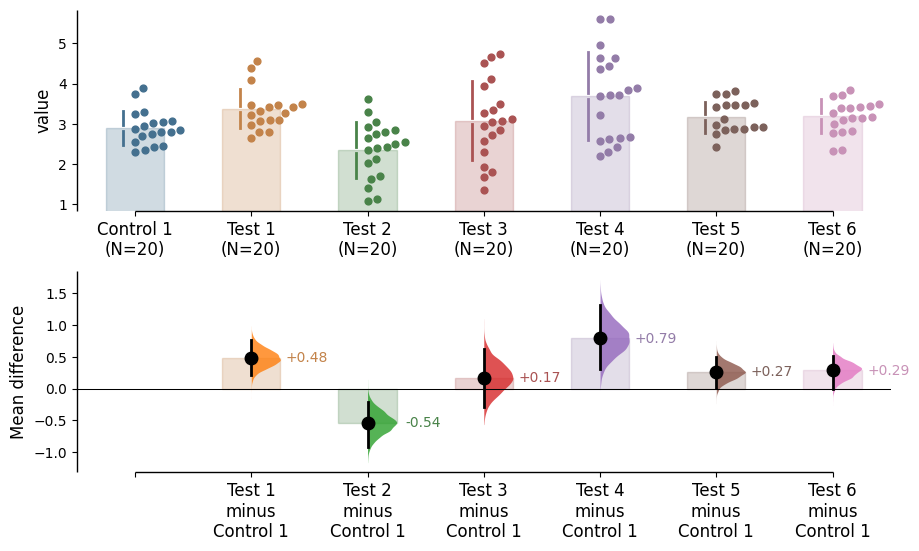

In [ ]:
shared_control.mean_diff.plot();

Thus ``dabest`` empowers you to perform robust analyses and present complex visualizations of your statistics elegantly.

In [ ]:
multi_groups = dabest.load(df, idx=(("Control 1", "Test 1",),
                                         ("Control 2", "Test 2","Test 3"),
                                         ("Control 3", "Test 4","Test 5", "Test 6")
                                       ))

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


In [ ]:
multi_groups

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:50 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 2
4. Test 4 minus Control 3
5. Test 5 minus Control 3
6. Test 6 minus Control 3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_groups.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:51 2024.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.221, 0.768].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 2 is -1.38 [95%CI -1.93, -0.895].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 3 is -0.666 [95%CI -1.3, -0.103].
The p-value of the two-sided permutation t-test is 0.0352, calculated for legacy purposes only. 

The unpaired mean difference between Control 3 and Test 4 is 0.362 [95%CI -0.114, 0.887].
The p-value of the two-sided permutation t-test is 0.161, calculated for legacy purposes only. 

The unpaired mean difference between Control 3 and Test 5 is -0.164 [95%CI -0.404, 0.0742].
The p-value of the two-sided permutation t-test is 0.208, calcul

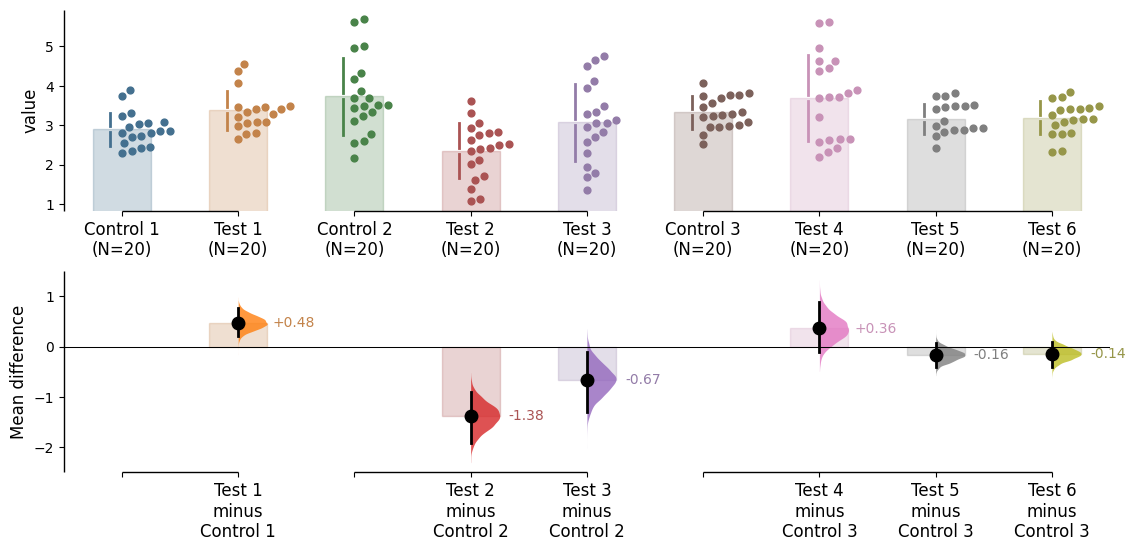

In [ ]:
multi_groups.mean_diff.plot();

### Using long (aka 'melted') data frames

``dabest`` can also handle 'melted' or 'long' data. This term is used because each row now corresponds to a single data point, with one column carrying the value and other columns containing 'metadata'
describing that data point.

For more details on wide vs long or 'melted' data, refer to this
[Wikipedia article](https://en.wikipedia.org/wiki/Wide_and_narrow_data). The
[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)
provides recipes for melting dataframes.


In [ ]:
x='group'
y='metric'

value_cols = df.columns[:-2] # select all but the "Gender" and "ID" columns.

df_melted = pd.melt(df.reset_index(),
                    id_vars=["Gender", "ID"],
                    value_vars=value_cols,
                    value_name=y,
                    var_name=x)

df_melted.head() # Gives the first five rows of `df_melted`.

,Gender,ID,group,metric
0,Female,1,Control 1,2.793984
1,Female,2,Control 1,3.236759
2,Female,3,Control 1,3.019149
3,Female,4,Control 1,2.804638
4,Female,5,Control 1,2.858019


When your data is in this format, you need to specify the ``x`` and
``y`` columns in ``dabest.load()``.


In [ ]:
analysis_of_long_df = dabest.load(df_melted, idx=("Control 1", "Test 1"),
                                     x="group", y="metric")

analysis_of_long_df

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:52 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

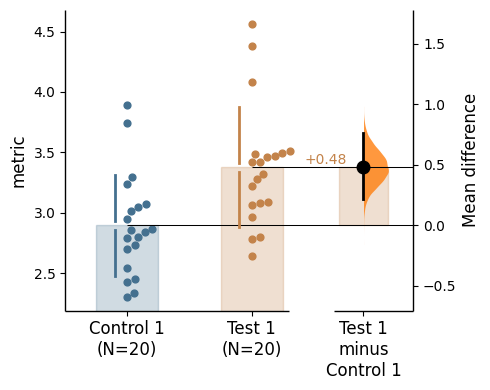

In [ ]:
analysis_of_long_df.mean_diff.plot();